# Image Filtering Example
This notebook demonstrates basic image filtering using NumPy and OpenCV. We'll look at:
1. Loading and displaying an image
2. Applying an edge detection filter
3. Visualizing the results

In [1]:
# Import required libraries
# Needs: "conda install opencv"
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Make plots larger and clearer
plt.rcParams['figure.figsize'] = [12, 4]

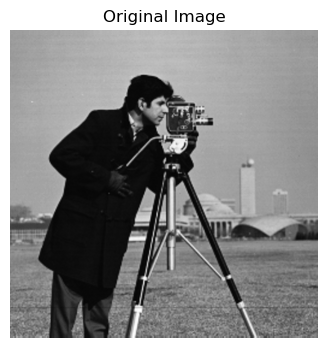

In [2]:
# Read the image
img = cv2.imread('./cameraman.tif', cv2.IMREAD_GRAYSCALE)

# Show original image
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [3]:
img.shape

(512, 512)

# Edge Detection Filter
We'll use a simple Sobel filter to detect vertical edges. The filter looks like this:
```
[-1  0  1]
[-2  0  2]
[-1  0  1]
```

In [4]:
# Define Sobel edge detection filter

# Vertical edges
sobel_xv = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Horizontal edges
sobel_xh = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

# Simple convolution function
def apply_filter(image, kernel):
    # Get dimensions
    height, width = image.shape
    k_height, k_width = kernel.shape
    
    # Padding
    pad_h = k_height // 2
    pad_w = k_width // 2
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    
    # Output image
    output = np.zeros_like(image, dtype=np.float32)
    
    # Apply convolution
    for i in range(height):
        for j in range(width):
            output[i, j] = np.sum(
                padded_img[i:i+k_height, j:j+k_width] * kernel
            )
    
    return output

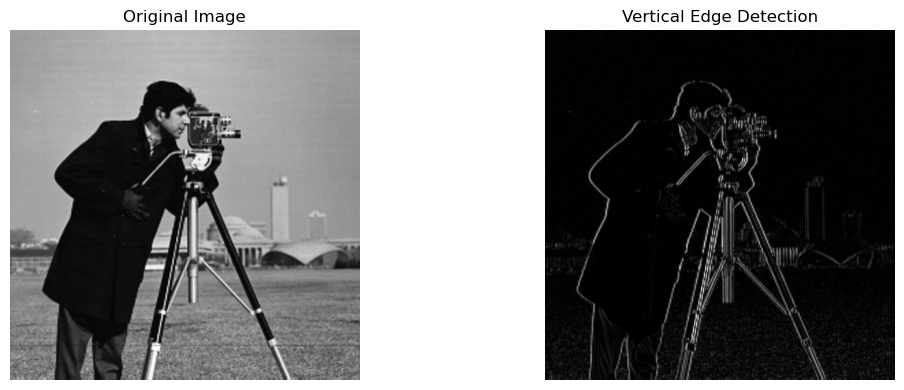

In [5]:
# Apply vertical edge detection
edge_img = apply_filter(img, sobel_xv)

# Normalize for better visualization
edge_img = np.abs(edge_img)
edge_img = (edge_img - edge_img.min()) / (edge_img.max() - edge_img.min()) * 255

# Show results side by side
plt.figure()
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edge_img, cmap='gray')
plt.title('Vertical Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

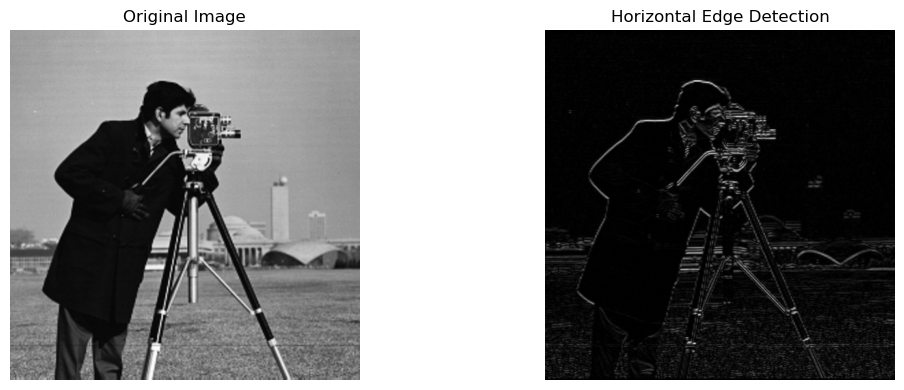

In [6]:
# Apply horizontal edge detection
edge_img = apply_filter(img, sobel_xh)

# Normalize for better visualization
edge_img = np.abs(edge_img)
edge_img = (edge_img - edge_img.min()) / (edge_img.max() - edge_img.min()) * 255

# Show results side by side
plt.figure()
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edge_img, cmap='gray')
plt.title('Horizontal Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Observations
The edge detection filter highlights:
- Vertical edges in the image
- Sharp transitions in intensity
- Details in the cameraman's features and equipment

Try modifying the filter or creating your own to see different effects!